# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of random number generation and limits

In [25]:
# Parameters of the Gamma distribution

mean = 10
sigma = sqrt(10.)

k = (mean/sigma)**2

lam = sigma**2/mean

# Considered limits

limlow = np.array([mean-sigma, mean-2*sigma,mean-3*sigma,mean-4*sigma,mean-5*sigma])
limhig = np.array([mean+sigma, mean+2*sigma,mean+3*sigma,mean+4*sigma,mean+5*sigma])

# Number generation procedure

def myrnd(N=1):
    
    rvec = np.random.gamma(k,scale=lam,size=(N))

    return rvec


### (3) Generate multiple numbers

In [30]:
Nmc = 10000000

rvec = myrnd(Nmc)

### (4)  Count limit probability

In [31]:
print("\nLower limit probability:")

for ll in limlow :
    nl = np.sum(rvec < ll)
    p = nl/Nmc
    ep = sqrt(p*(1-p)/Nmc)
    print (" P ( x < ",ll,") = ",p," +/- ",ep)
    
print("\nUpper limit probability:")

for ul in limhig :
    nl = np.sum(rvec > ul)
    p = nl/Nmc
    ep = sqrt(p*(1-p)/Nmc)
    print (" P ( x > ",ul,") = ",p," +/- ",ep)
    


Lower limit probability:
 P ( x <  6.83772233983162 ) =  0.1533757  +/-  0.00011395244387441194
 P ( x <  3.675444679663241 ) =  0.0046445  +/-  2.1500996767010592e-05
 P ( x <  0.5131670194948619 ) =  0.0  +/-  0.0
 P ( x <  -2.649110640673518 ) =  0.0  +/-  0.0
 P ( x <  -5.811388300841898 ) =  0.0  +/-  0.0

Upper limit probability:
 P ( x >  13.16227766016838 ) =  0.1554444  +/-  0.00011457811244240323
 P ( x >  16.32455532033676 ) =  0.0368358  +/-  5.9564187091204394e-05
 P ( x >  19.486832980505138 ) =  0.0067406  +/-  2.5875015578043618e-05
 P ( x >  22.64911064067352 ) =  0.0010105  +/-  1.0047282666223738e-05
 P ( x >  25.811388300841898 ) =  0.0001305  +/-  3.6122426517331305e-06


### (5) Fill distribution histogram

In [33]:
# Histogram to collect results

Xmin=0
Xmax=40
Nbin = 100
dX=(Xmax-Xmin)/Nbin

hexp = TH1D('hexp','Probability distribution from MC',Nbin, Xmin, Xmax)

# Main experiment loop

wexp = 1./Nmc/dX

for r in  rvec:
    hexp.Fill(r,wexp)
    

Warning in <TROOT::Append>: Replacing existing TH1: hexp (Potential memory leak).


### (6) Plot histogranm

Mean value:  10.000313302746873


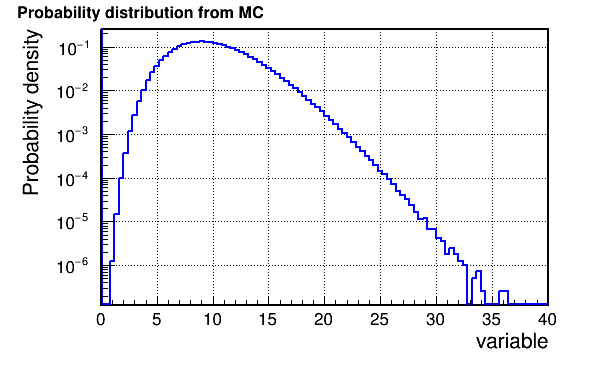

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Info in <TCanvas::Print>: png file 05_interval3.png has been created


In [34]:
# Log scale

gStyle.SetOptLogy(1)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Axis description

hexp.GetXaxis().SetTitle("variable")
hexp.GetYaxis().SetTitle("Probability density")

# No statistics

hexp.SetStats(0)

print('Mean value: ',hexp.GetMean())

# Plot style

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

cexp.Update()
fname = '05_interval3.png'
cexp.Print(fname)

Image(filename=fname)